In [253]:
import pandas as pd
import csv
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import json

In [254]:
stock = pd.read_csv('CAvideos.csv')
stock2 = pd.read_csv("USvideos.csv")
stock3 = pd.read_csv("JPvideos.csv", engine = 'python')
stock4 = pd.read_csv("KRvideos.csv", engine = 'python')

In [255]:
stock["description"] = stock["description"].fillna(value="")
stock2["description"] = stock2["description"].fillna(value="")
stock3["description"] = stock3["description"].fillna(value="")
stock4["description"] = stock4["description"].fillna(value="")

In [256]:
stock.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [257]:
stock2.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [258]:
stock3.describe()

,category_id,views,likes,dislikes,comment_count
count,20523.000000,2.052300e+04,2.052300e+04,20523.000000,20523.000000
mean,19.807533,2.620215e+05,8.059587e+03,366.823613,1196.077864
std,6.655895,1.294938e+06,8.384837e+04,2658.598540,14943.608305
min,1.000000,7.980000e+02,0.000000e+00,0.000000,0.000000
25%,17.000000,1.710000e+04,1.210000e+02,9.000000,19.000000
50%,22.000000,6.408400e+04,6.480000e+02,43.000000,133.000000
75%,24.000000,1.833670e+05,2.303000e+03,178.000000,488.000000
max,29.000000,6.279639e+07,4.470923e+06,119053.000000,905925.000000


In [259]:
stock4.describe()

,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


Persentase Jumlah Video Canada tahun 2018 adalah 76.5 %
Persentase Jumlah Video Canada tahun 2017 adalah 23.5 %
Persentase Jumlah Video US tahun 2018 adalah 76.6 %
Persentase Jumlah Video US tahun 2017 adalah 23.4 %


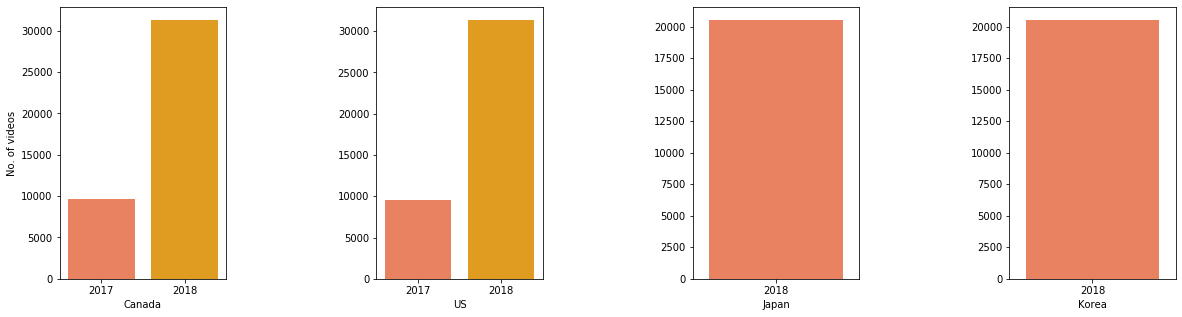

In [260]:
firstdf = stock["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
seconddf = stock2["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
thirddf = stock3["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fourthdf = stock4["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots(ncols=4, figsize = (20,5))
_ = sns.barplot(x="year", y="No_of_videos", data=firstdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax[0])
_ = ax[0].set(xlabel="Canada", ylabel="No. of videos")
_ = sns.barplot(x="year", y="No_of_videos", data=seconddf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax[1])
_ = ax[1].set(xlabel="US", ylabel="")
_ = sns.barplot(x="year", y="No_of_videos", data=thirddf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax[2])
_ = ax[2].set(xlabel="Japan", ylabel="")
_ = sns.barplot(x="year", y="No_of_videos", data=thirddf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax[3])
_ = ax[3].set(xlabel="Korea", ylabel="")

a = stock["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
b = stock2["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
c = stock3["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
d = stock4["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

for n in range (len(a)):
    print ('Persentase Jumlah Video Canada tahun', a.index[n], 'adalah', round(a[n]*100, 1), '%')
for n in range (len(b)):
    print ('Persentase Jumlah Video US tahun', b.index[n], 'adalah', round(b[n]*100, 1), '%')

Total Videos per Country for Every Million Views


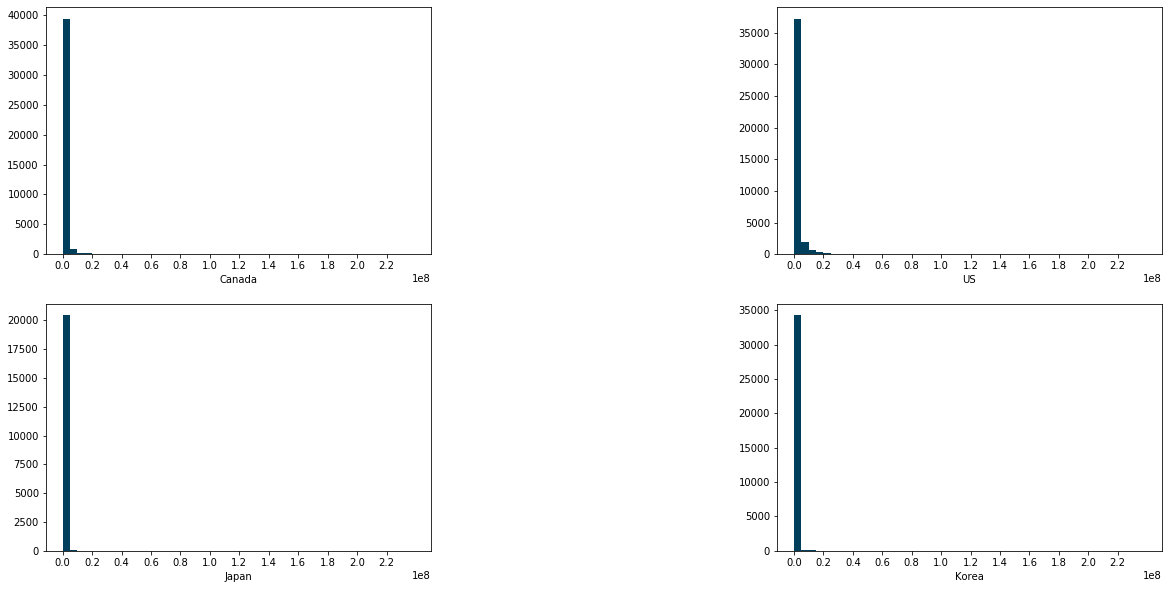

In [261]:
print('Total Videos per Country for Every Million Views')
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
_ = sns.distplot(stock["views"], kde=False, color='#003f5c', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="", xticks=np.arange(0, 2.4e8, 2e7))
_ = ax[0][0].set_xlim(right=2.5e8)

_ = sns.distplot(stock2["views"], kde=False, color='#003f5c', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="", xticks=np.arange(0, 2.4e8, 2e7))
_ = ax[0][1].set_xlim(right=2.5e8)

_ = sns.distplot(stock3["views"], kde=False, color='#003f5c', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="", xticks=np.arange(0, 2.4e8, 2e7))
_ = ax[1][0].set_xlim(right=2.5e8)

_ = sns.distplot(stock4["views"], kde=False, color='#003f5c', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="", xticks=np.arange(0, 2.4e8, 2e7))
_ = ax[1][1].set_xlim(right=2.5e8)

Closer Look of Total Videos per Country for Every Million Views


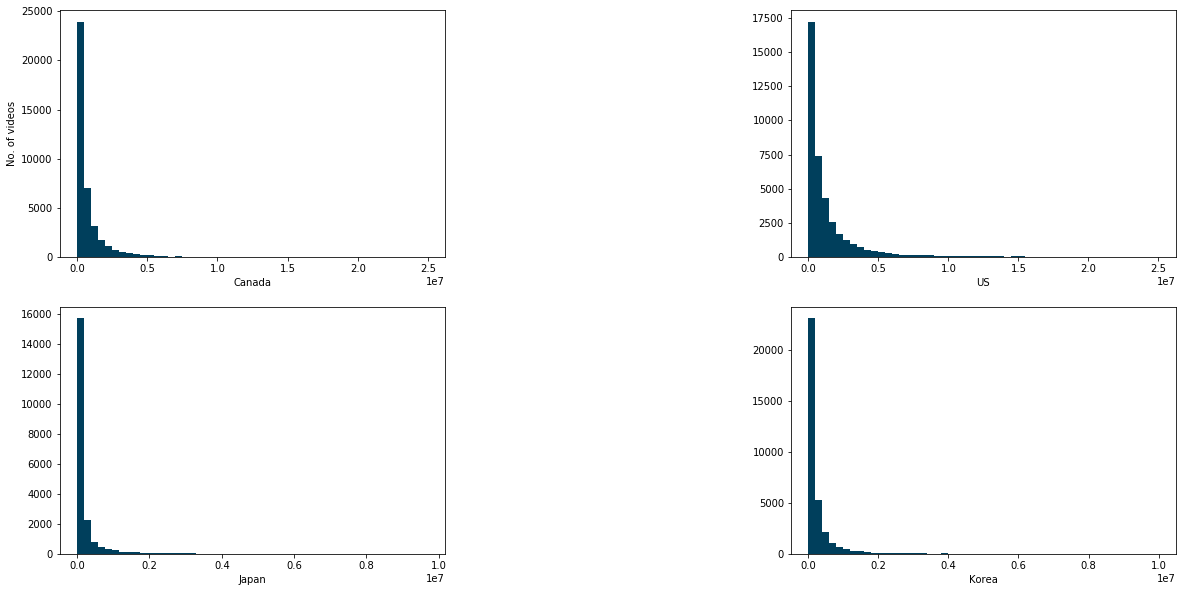

In [262]:
print('Closer Look of Total Videos per Country for Every Million Views')
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
plt.title='Total Videos per Country for Every Million Views'
_ = sns.distplot(stock[stock["views"] < 25e6]["views"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="No. of videos")

_ = sns.distplot(stock2[stock2["views"] < 25e6]["views"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="")

_ = sns.distplot(stock3[stock3["views"] < 10e6]["views"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="")

_ = sns.distplot(stock4[stock4["views"] < 10e6]["views"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="")

In [263]:
print('Persentase jumlah views dibawah 1 juta (CA) :', round((stock[stock['views'] < 1e6]['views'].count() / stock['views'].count() * 100), 1), '%')
print('Persentase jumlah views dibawah 1 juta (US) :', round((stock2[stock2['views'] < 1e6]['views'].count() / stock2['views'].count() * 100), 1), '%')
print('Persentase jumlah views dibawah 1 juta (JP) :', round((stock3[stock3['views'] < 1e6]['views'].count() / stock3['views'].count() * 100), 1), '%')
print('Persentase jumlah views dibawah 1 juta (KR) :', round((stock4[stock4['views'] < 1e6]['views'].count() / stock4['views'].count() * 100), 1), '%')

Persentase jumlah views dibawah 1 juta (CA) : 75.8 %
Persentase jumlah views dibawah 1 juta (US) : 60.1 %
Persentase jumlah views dibawah 1 juta (JP) : 95.3 %
Persentase jumlah views dibawah 1 juta (KR) : 93.8 %


Total Videos per Country vs Likes


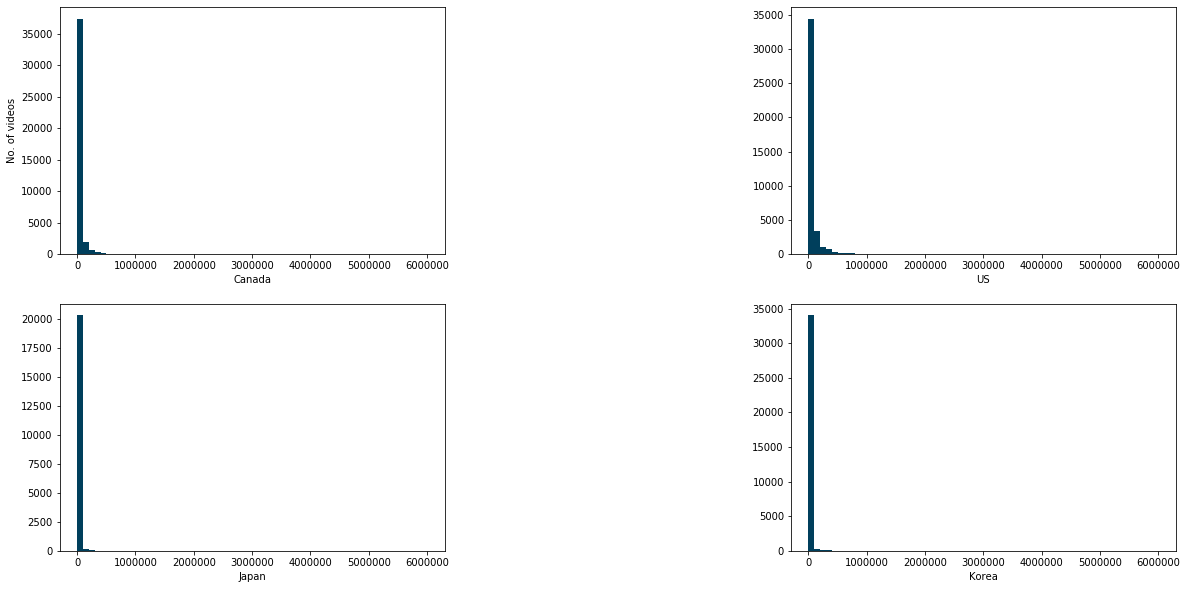

In [264]:
print('Total Videos per Country vs Likes')
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
_ = sns.distplot(stock["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="No. of videos")

_ = sns.distplot(stock2["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="")

_ = sns.distplot(stock3["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="")

_ = sns.distplot(stock4["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="")


Closer Look of Total Videos per Country vs Likes


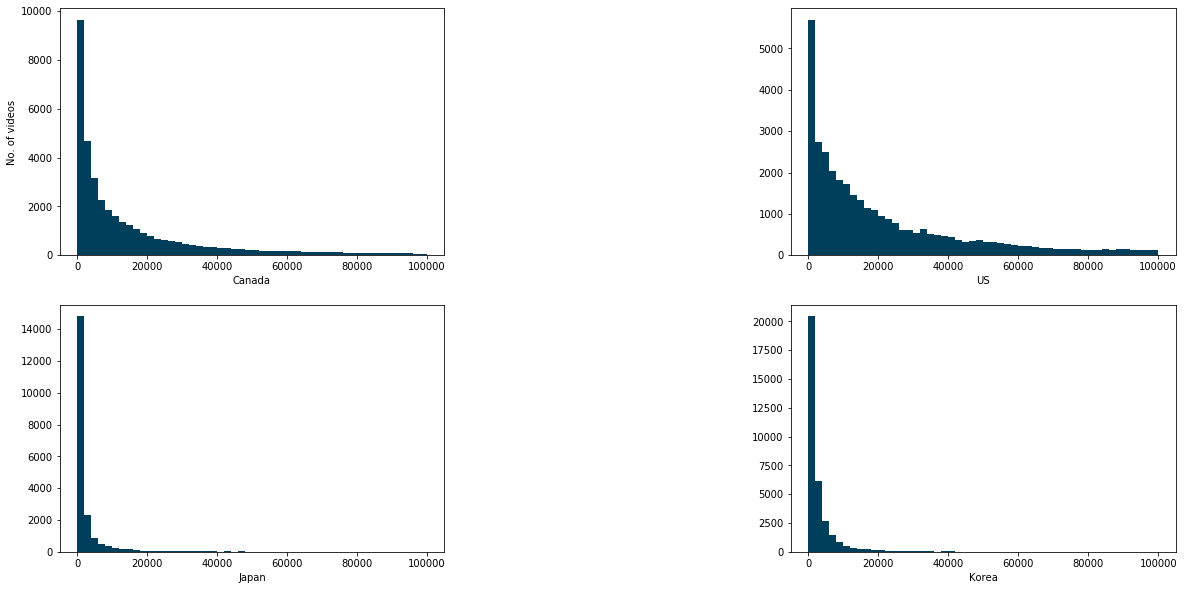

In [265]:
print('Closer Look of Total Videos per Country vs Likes')
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
plt.title='Total Videos per Country for Every Million Views'
_ = sns.distplot(stock[stock["likes"] < 1e5]["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="No. of videos")

_ = sns.distplot(stock2[stock2["likes"] < 1e5]["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="")

_ = sns.distplot(stock3[stock3["likes"] < 1e5]["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="")

_ = sns.distplot(stock4[stock4["likes"] < 1e5]["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="")

In [266]:
print('Persentase jumlah likes dibawah 40 ribu (CA) :', round((stock[stock['likes'] < 4e4]['likes'].count() / stock['likes'].count() * 100), 1), '%')
print('Persentase jumlah likes dibawah 40 ribu (US) :', round((stock2[stock2['likes'] < 4e4]['likes'].count() / stock2['likes'].count() * 100), 1), '%')
print('Persentase jumlah likes dibawah 40 ribu (JP) :', round((stock3[stock3['likes'] < 4e4]['likes'].count() / stock3['likes'].count() * 100), 1), '%')
print('Persentase jumlah likes dibawah 40 ribu (KR) :', round((stock4[stock4['likes'] < 4e4]['likes'].count() / stock4['likes'].count() * 100), 1), '%')

Persentase jumlah likes dibawah 40 ribu (CA) : 80.6 %
Persentase jumlah likes dibawah 40 ribu (US) : 68.5 %
Persentase jumlah likes dibawah 40 ribu (JP) : 97.6 %
Persentase jumlah likes dibawah 40 ribu (KR) : 97.3 %


Total Videos per Country vs Comments


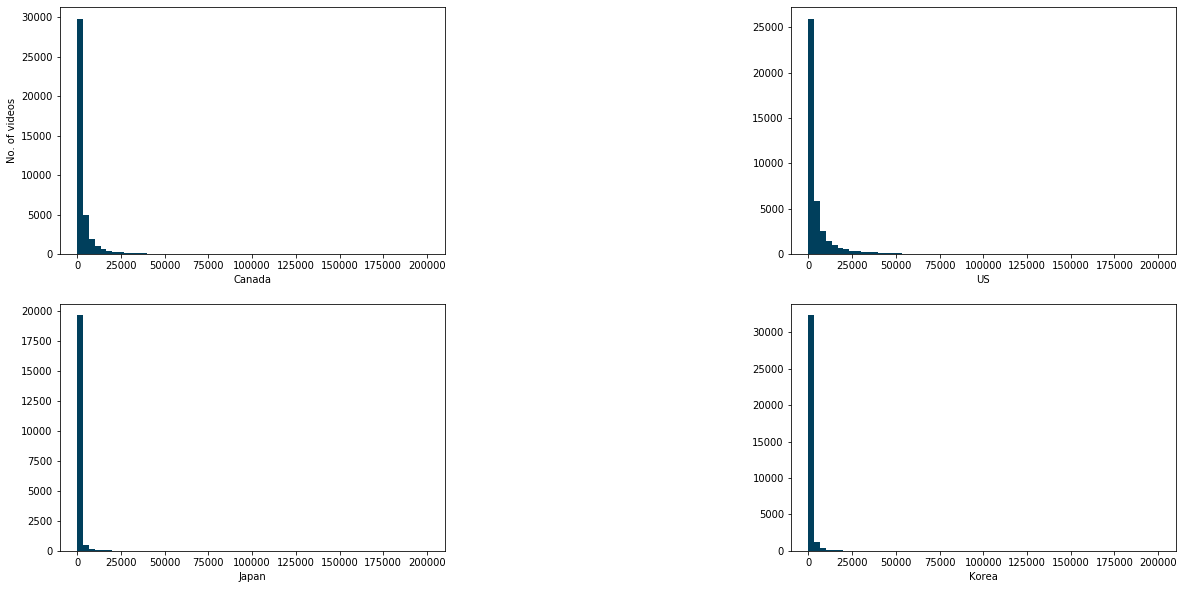

In [267]:
print('Total Videos per Country vs Comments')
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
_ = sns.distplot(stock["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 61), ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="No. of videos")

_ = sns.distplot(stock2["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 61), ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="")

_ = sns.distplot(stock3["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 61), ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="")

_ = sns.distplot(stock4["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 61), ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="")


Closer Look of Total Videos per Country vs Comments


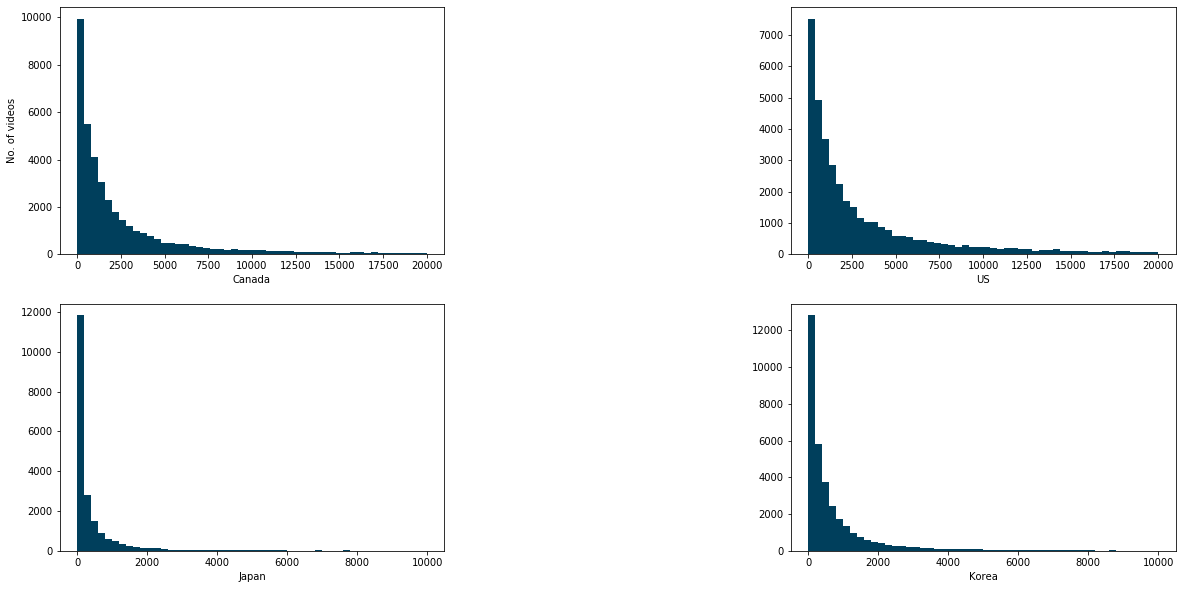

In [268]:
print('Closer Look of Total Videos per Country vs Comments')
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
plt.title='Total Videos per Country for Every Million Views'
_ = sns.distplot(stock[stock["comment_count"] < 2e4]["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][0])
_ = ax[0][0].set(xlabel="Canada", ylabel="No. of videos")

_ = sns.distplot(stock2[stock2["comment_count"] < 2e4]["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[0][1])
_ = ax[0][1].set(xlabel="US", ylabel="")

_ = sns.distplot(stock3[stock3["comment_count"] < 1e4]["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][0])
_ = ax[1][0].set(xlabel="Japan", ylabel="")

_ = sns.distplot(stock4[stock4["comment_count"] < 1e4]["comment_count"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax[1][1])
_ = ax[1][1].set(xlabel="Korea", ylabel="")

In [269]:
print('Persentase jumlah comment dibawah 4 ribu (CA) :', round((stock[stock['comment_count'] < 4e3]['comment_count'].count() / stock['comment_count'].count() * 100), 1), '%')
print('Persentase jumlah comment dibawah 4 ribu (US) :', round((stock2[stock2['comment_count'] < 4e3]['comment_count'].count() / stock2['comment_count'].count() * 100), 1), '%')
print('Persentase jumlah comment dibawah 4 ribu (JP) :', round((stock3[stock3['comment_count'] < 4e3]['comment_count'].count() / stock3['comment_count'].count() * 100), 1), '%')
print('Persentase jumlah comment dibawah 4 ribu (KR) :', round((stock4[stock4['comment_count'] < 4e3]['comment_count'].count() / stock4['comment_count'].count() * 100), 1), '%')

Persentase jumlah comment dibawah 4 ribu (CA) : 76.5 %
Persentase jumlah comment dibawah 4 ribu (US) : 67.5 %
Persentase jumlah comment dibawah 4 ribu (JP) : 96.1 %
Persentase jumlah comment dibawah 4 ribu (KR) : 94.6 %


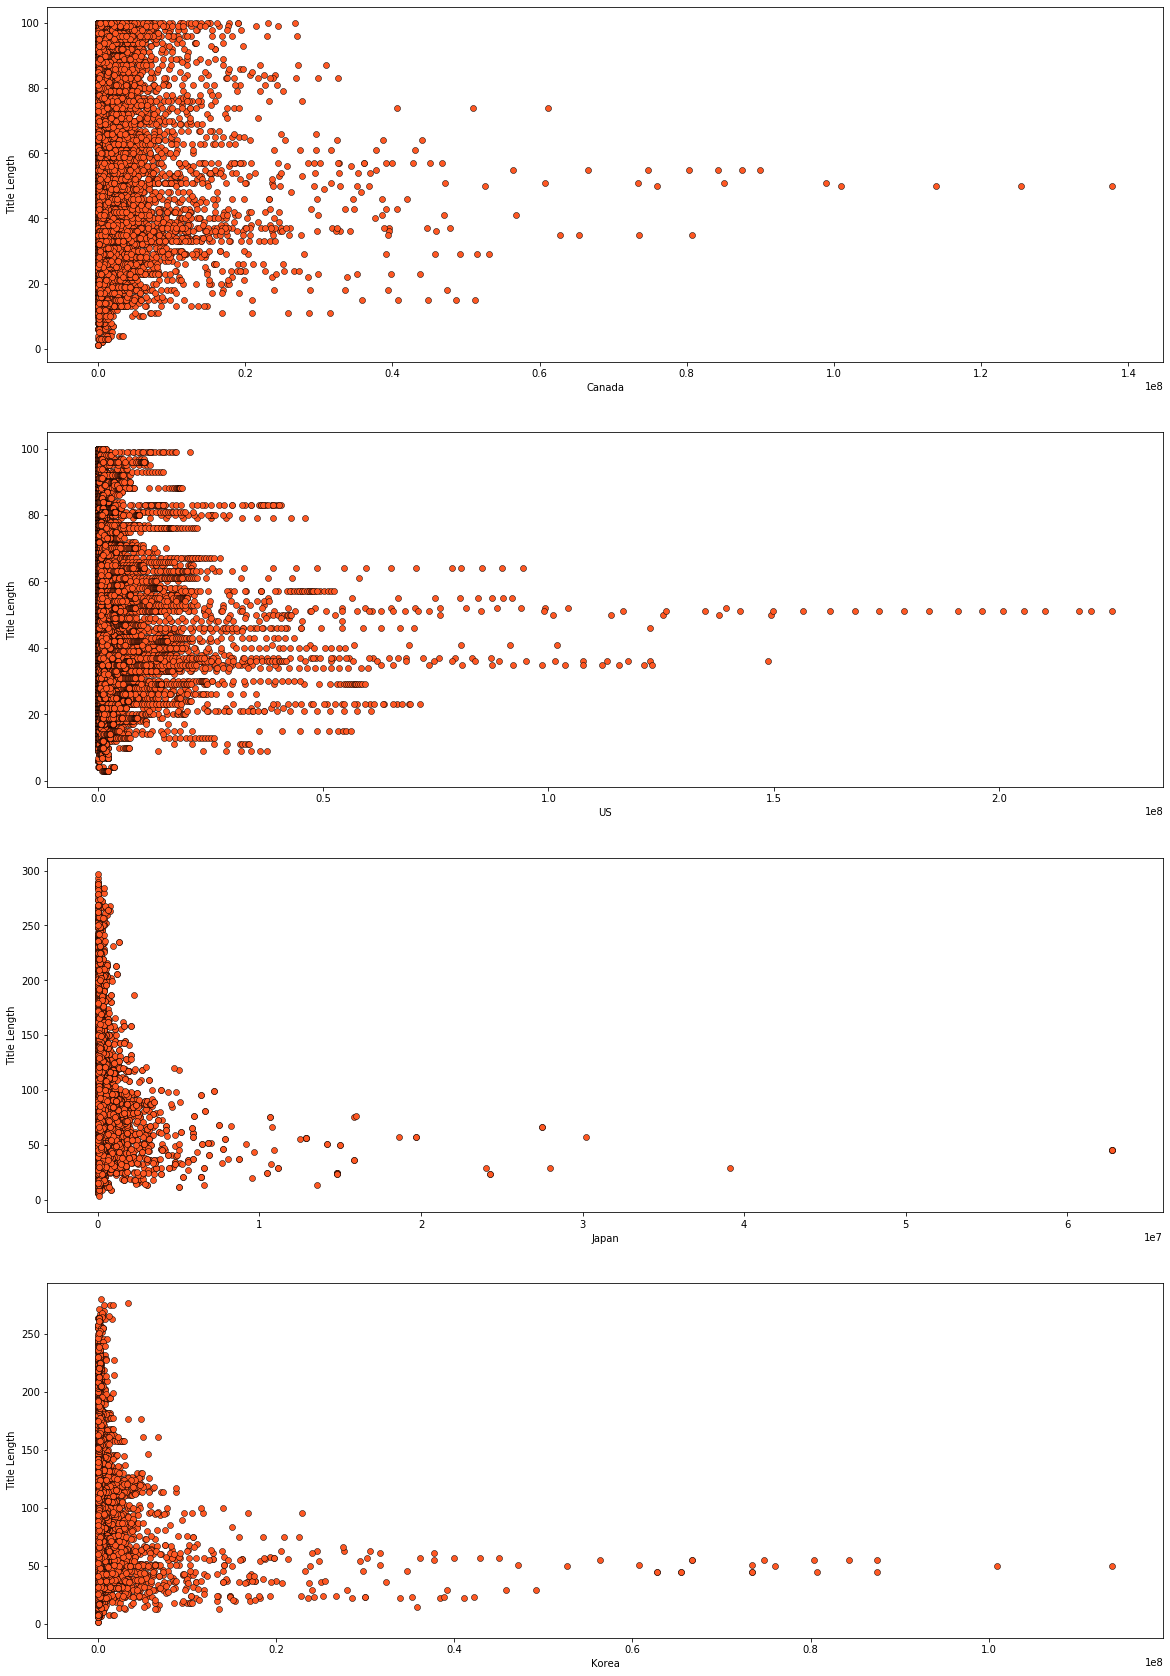

In [270]:
stock["title_length"] = stock["title"].apply(lambda x: len(x))
stock2["title_length"] = stock2["title"].apply(lambda x: len(x))
stock3["title_length"] = stock3["title"].apply(lambda x: len(x))
stock4["title_length"] = stock4["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(nrows = 4, figsize = (20,30))
_ = ax[0].scatter(x=stock['views'], y=stock['title_length'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
_ = ax[0].set(xlabel="Canada", ylabel="Title Length")
_ = ax[1].scatter(x=stock2['views'], y=stock2['title_length'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
_ = ax[1].set(xlabel="US", ylabel="Title Length")
_ = ax[2].scatter(x=stock3['views'], y=stock3['title_length'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
_ = ax[2].set(xlabel="Japan", ylabel="Title Length")
_ = ax[3].scatter(x=stock4['views'], y=stock4['title_length'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
_ = ax[3].set(xlabel="Korea", ylabel="Title Length")

In [302]:
print('Canada :')
title_words = list(stock["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(20)

Canada :


[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056)]

In [303]:
print('USA')
title_words2 = list(stock2["title"].apply(lambda x: x.split()))
title_words2 = [x for y in title_words2 for x in y]
Counter(title_words2).most_common(20)

USA


[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552)]

In [304]:
print('Japan')
title_words3 = list(stock3["title"].apply(lambda x: x.split()))
title_words3 = [x for y in title_words3 for x in y]
Counter(title_words3).most_common(20)

Japan


[('-', 1167),
 ('2018', 750),
 ('|', 740),
 ('/', 537),
 ('vs', 435),
 ('&', 221),
 ('the', 206),
 ('Episode', 205),
 ('Highlights', 202),
 ('Game', 176),
 ('in', 174),
 ('The', 174),
 ('Full', 162),
 ('HD', 140),
 ('of', 135),
 ('2', 131),
 ('±', 122),
 ('to', 115),
 ('and', 114),
 ('ä¹ƒæœ¨å�‚46', 111)]

In [305]:
print('Korea')
title_words4 = list(stock4["title"].apply(lambda x: x.split()))
title_words4 = [x for y in title_words4 for x in y]
Counter(title_words4).most_common(20)

Korea


[('ì', 6487),
 ('-', 4116),
 ('|', 2453),
 ('/', 2087),
 ('ê³', 1610),
 ('ì‹', 1309),
 ('„', 1278),
 ('ì�´ìœ', 1052),
 ('ìœ', 1010),
 (']', 992),
 ('ì„', 943),
 ('ë', 891),
 ('ëŒ€í†µë', 864),
 ('ë¬¸ìž¬ì�¸', 823),
 ('œ', 718),
 ('ê¹€ì', 709),
 ('¹', 687),
 ('�', 660),
 ('ë²', 656),
 ('2018', 652)]

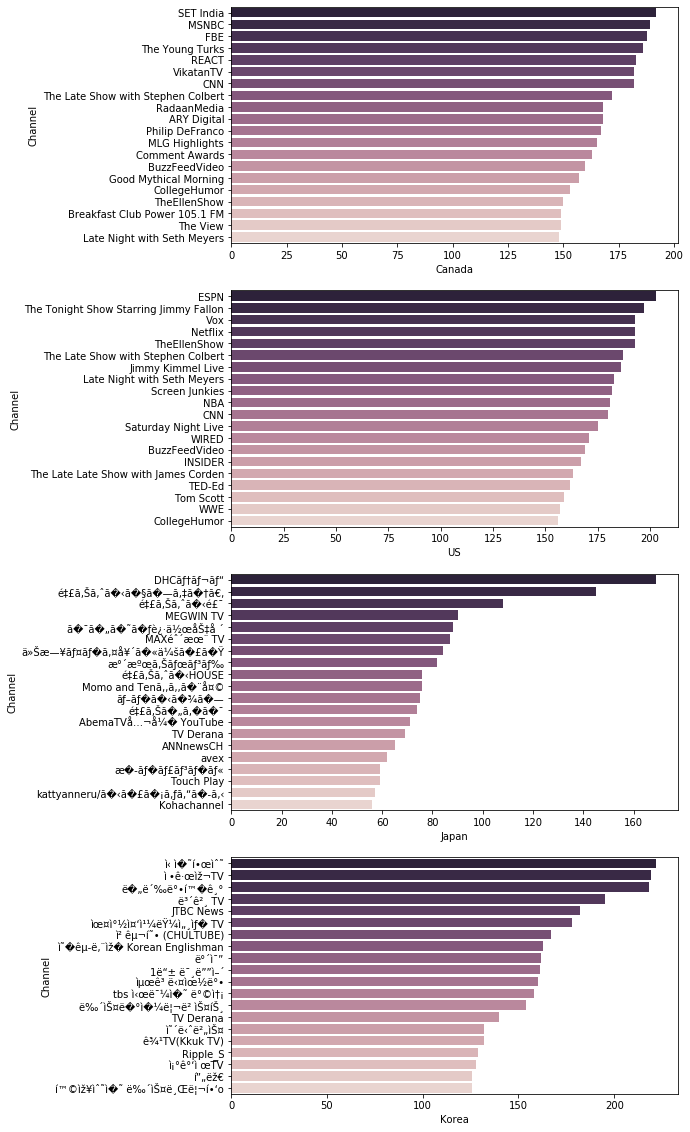

In [293]:
cdf = stock.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)
ddf = stock2.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)
edf = stock3.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)
fdf = stock4.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(nrows = 4, figsize=(8,20))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax[0])
_ = ax[0].set(xlabel="Canada", ylabel="Channel")

_ = sns.barplot(x="video_count", y="channel_title", data=ddf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax[1])
_ = ax[1].set(xlabel="US", ylabel="Channel")

_ = sns.barplot(x="video_count", y="channel_title", data=edf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax[2])
_ = ax[2].set(xlabel="Japan", ylabel="Channel")

_ = sns.barplot(x="video_count", y="channel_title", data=fdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax[3])
_ = ax[3].set(xlabel="Korea", ylabel="Channel")

In [286]:
with open("CA_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
stock['category_name'] = stock['category_id'].map(cat_dict)

with open("US_category_id.json") as g:
    categories2 = json.load(g)["items"]
cats_dict = {}
for cats in categories2:
    cats_dict[int(cats["id"])] = cats["snippet"]["title"]
stock2['category_name'] = stock2['category_id'].map(cats_dict)

with open("JP_category_id.json") as h:
    categories3 = json.load(h)["items"]
catss_dict = {}
for catss in categories3:
    catss_dict[int(catss["id"])] = catss["snippet"]["title"]
stock3['category_name'] = stock3['category_id'].map(catss_dict)

with open("KR_category_id.json") as i:
    categories4 = json.load(i)["items"]
catsss_dict = {}
for catsss in categories4:
    catsss_dict[int(catsss["id"])] = catsss["snippet"]["title"]
stock4['category_name'] = stock4['category_id'].map(catsss_dict)

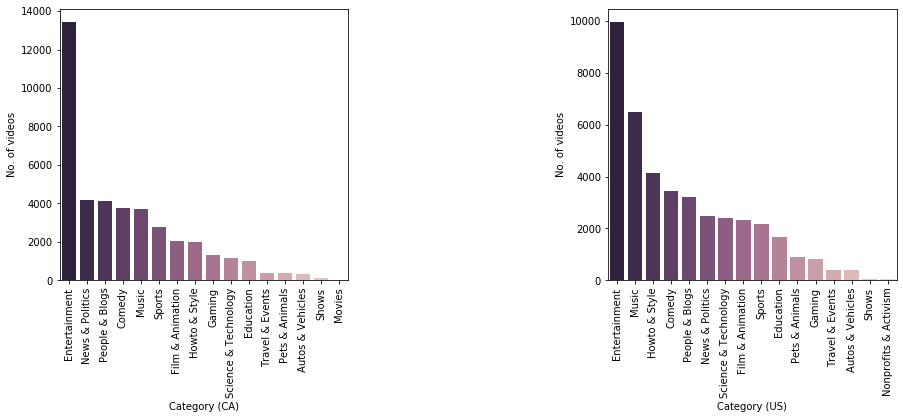

In [298]:
cdf2 = stock["category_name"].value_counts().to_frame().reset_index()
cdf2.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

ddf2 = stock2["category_name"].value_counts().to_frame().reset_index()
ddf2.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

edf2 = stock3["category_name"].value_counts().to_frame().reset_index()
edf2.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

fdf2 = stock4["category_name"].value_counts().to_frame().reset_index()
fdf2.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)



_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf2, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set(xlabel="Category (CA)", ylabel="No. of videos")

_ = sns.barplot(x="category_name", y="No_of_videos", data=ddf2, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set(xlabel="Category (US)", ylabel="No. of videos")

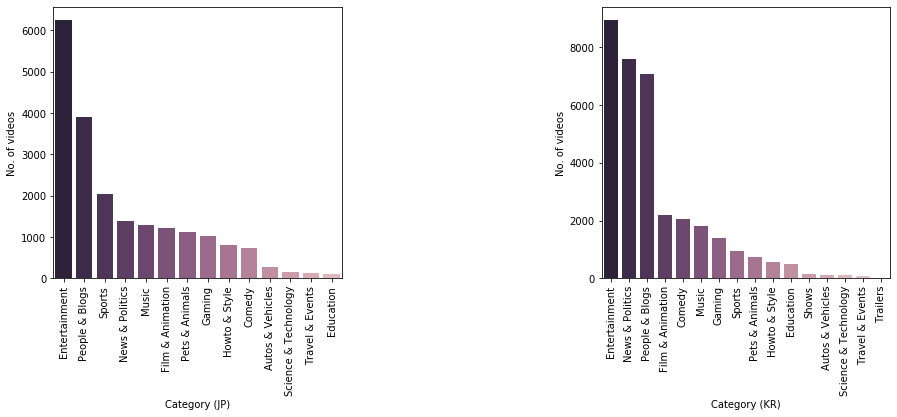

In [301]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))
_ = sns.barplot(x="category_name", y="No_of_videos", data=edf2, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set(xlabel="Category (JP)", ylabel="No. of videos")

_ = sns.barplot(x="category_name", y="No_of_videos", data=fdf2, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set(xlabel="Category (KR)", ylabel="No. of videos")